In [13]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("../data/captone_data.csv")
df.head(10)

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0
5,1390655,ST0101EN,3.0
6,367075,DS0301EN,3.0
7,1858700,CC0101EN,3.0
8,600100,BD0211EN,3.0
9,623377,DS0105EN,3.0


In [15]:
print(df['rating'].value_counts())

rating
3.0    222330
2.0     10976
Name: count, dtype: int64


In [16]:
df_like = df[df['rating'] == 3.0]
df_dislike = df[df['rating'] == 2.0]

In [17]:
df_dislike_oversampled = resample(df_dislike,
                                  replace=True,            
                                  n_samples=len(df_like),   
                                  random_state=42)

In [18]:
df_balanced = pd.concat([df_like, df_dislike_oversampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [19]:
df_balanced.head(20)

,user,item,rating
0,1614425,DS0105EN,3.0
1,310946,CB0103EN,2.0
2,1269758,BD0101EN,3.0
3,2086648,ML0151EN,3.0
4,598129,ML0109EN,3.0
5,607457,PY0101EN,3.0
6,1651438,CNSC02EN,2.0
7,4,PY0101EN,2.0
8,507443,DS0101EN,2.0
9,1111747,BD0211EN,3.0


In [20]:
print(df_balanced['rating'].value_counts())

rating
3.0    222330
2.0    222330
Name: count, dtype: int64


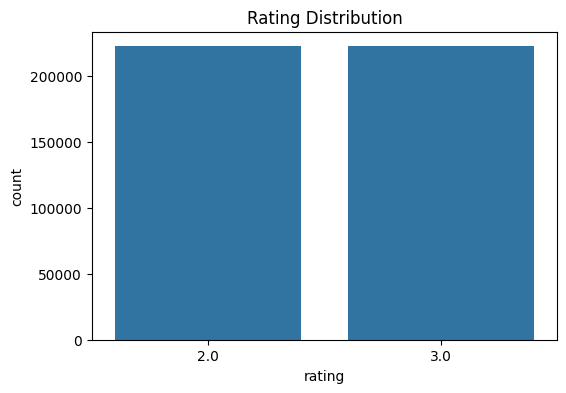

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df_balanced)
plt.title("Rating Distribution")
plt.show()

In [22]:
import os

output_path = "../data/oversampling_data.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)

df_balanced.to_csv(output_path, index=False)